# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 614


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL

query_url = f"http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID={weather_api_key}"

# Define an empty list to fetch the weather data for each city
city_data = []

#Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# # Create counters
record_count = 1
set_count = 1

# # Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
#     # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

#     # Create endpoint URL with each city
    city_url = query_url + '&q=' + city
    
#     # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

#     # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    # 
    try:
    #     # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

    #     # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = pd.to_datetime(city_weather['dt'])

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
       print("City not found. Skipping...")
    pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")
# print(json.dumps(city_url, indent=4, sort_keys=True))

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | bilma
Processing Record 5 of Set 1 | amderma
City not found. Skipping...
Processing Record 6 of Set 1 | jamestown
Processing Record 7 of Set 1 | nehe
Processing Record 8 of Set 1 | bonthe
Processing Record 9 of Set 1 | severo-kurilsk
Processing Record 10 of Set 1 | bethel
Processing Record 11 of Set 1 | punta arenas
Processing Record 12 of Set 1 | mlonggo
Processing Record 13 of Set 1 | acapulco
Processing Record 14 of Set 1 | vardo
Processing Record 15 of Set 1 | husavik
Processing Record 16 of Set 1 | tiksi
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | victoria
Processing Record 20 of Set 1 | batticaloa
Processing Record 21 of Set 1 | hit
Processing Record 22 of Set 1 | tazovskiy


In [18]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          560
Lat           560
Lng           560
Max Temp      560
Humidity      560
Cloudiness    560
Wind Speed    560
Country       560
Date          560
dtype: int64

In [19]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.1203,-134.9692,24.97,71,75,6.07,PF,1970-01-01 00:00:01.680909791
1,tuktoyaktuk,69.4541,-133.0374,-14.00,78,100,13.38,CA,1970-01-01 00:00:01.680909909
2,bilma,18.6853,12.9164,30.34,12,27,3.38,NE,1970-01-01 00:00:01.680909909
3,jamestown,42.0970,-79.2353,4.77,54,0,4.63,US,1970-01-01 00:00:01.680909704
4,nehe,48.4833,124.8333,-0.65,47,13,1.40,CN,1970-01-01 00:00:01.680909911


In [20]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [21]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,24.97,71,75,6.07,PF,1970-01-01 00:00:01.680909791
1,tuktoyaktuk,69.4541,-133.0374,-14.00,78,100,13.38,CA,1970-01-01 00:00:01.680909909
2,bilma,18.6853,12.9164,30.34,12,27,3.38,NE,1970-01-01 00:00:01.680909909
3,jamestown,42.0970,-79.2353,4.77,54,0,4.63,US,1970-01-01 00:00:01.680909704
4,nehe,48.4833,124.8333,-0.65,47,13,1.40,CN,1970-01-01 00:00:01.680909911


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

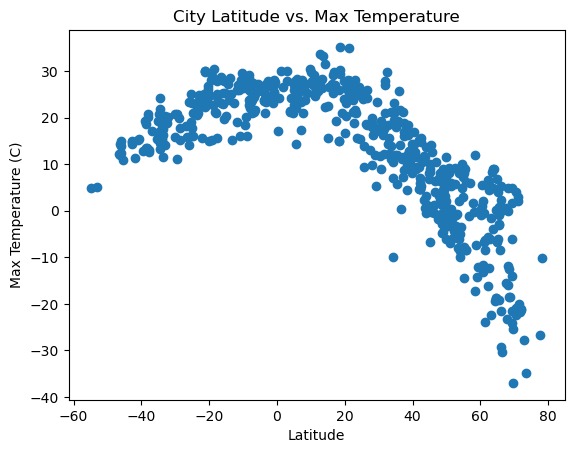

In [22]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df['Lat']
y_values = city_data_df['Max Temp']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

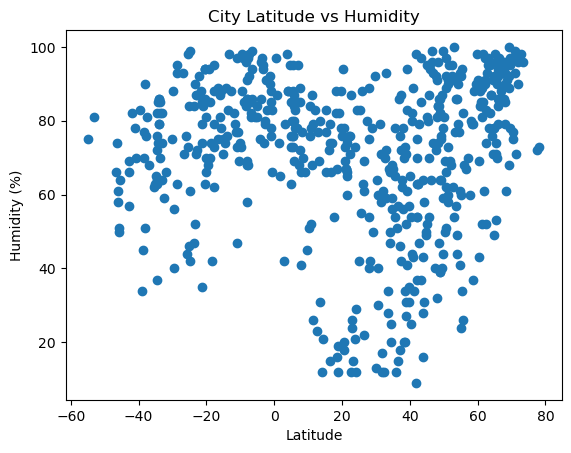

In [23]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df['Lat']
y_values = city_data_df['Humidity']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

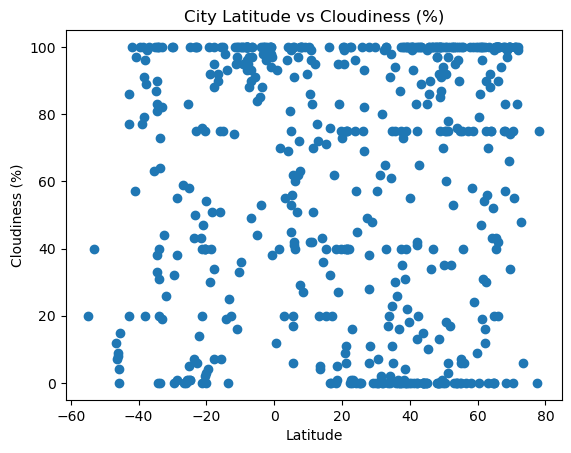

In [24]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df['Lat']
y_values = city_data_df['Cloudiness']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs Cloudiness (%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

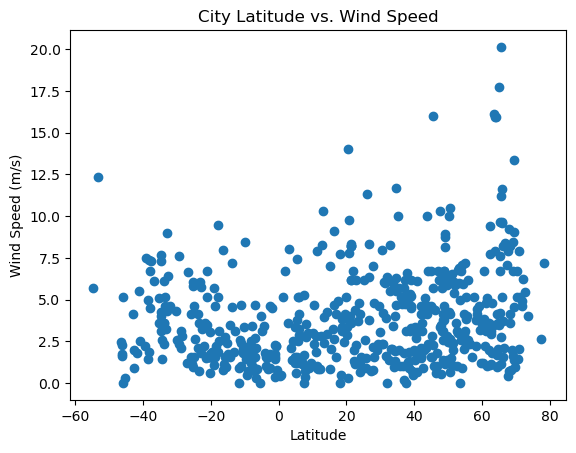

In [25]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df['Lat']
y_values = city_data_df['Wind Speed']
plt.scatter(x_values,y_values)

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df['Lat'] >= 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,tuktoyaktuk,69.4541,-133.0374,-14.00,78,100,13.38,CA,1970-01-01 00:00:01.680909909
2,bilma,18.6853,12.9164,30.34,12,27,3.38,NE,1970-01-01 00:00:01.680909909
3,jamestown,42.0970,-79.2353,4.77,54,0,4.63,US,1970-01-01 00:00:01.680909704
4,nehe,48.4833,124.8333,-0.65,47,13,1.40,CN,1970-01-01 00:00:01.680909911
5,bonthe,7.5264,-12.5050,26.45,85,63,1.67,SL,1970-01-01 00:00:01.680909911


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df['Lat'] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rikitea,-23.1203,-134.9692,24.97,71,75,6.07,PF,1970-01-01 00:00:01.680909791
8,punta arenas,-53.1500,-70.9167,5.06,81,40,12.35,CL,1970-01-01 00:00:01.680909729
9,mlonggo,-6.5333,110.7000,25.05,86,97,2.10,ID,1970-01-01 00:00:01.680909914
14,port alfred,-33.5906,26.8910,16.21,85,64,5.15,ZA,1970-01-01 00:00:01.680909916
15,ancud,-41.8697,-73.8203,11.29,82,100,1.79,CL,1970-01-01 00:00:01.680909916


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7161472181434118


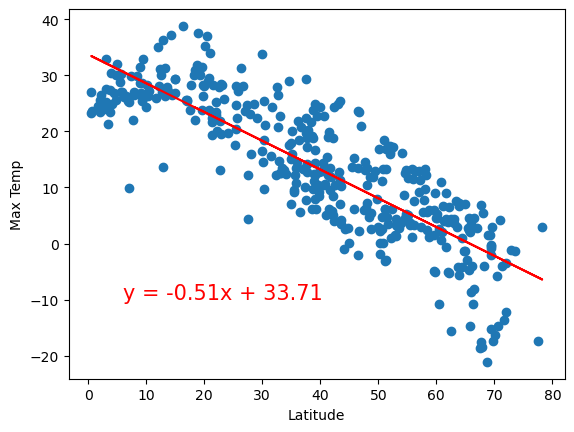

In [15]:
# Linear regression on Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.4121057168607245


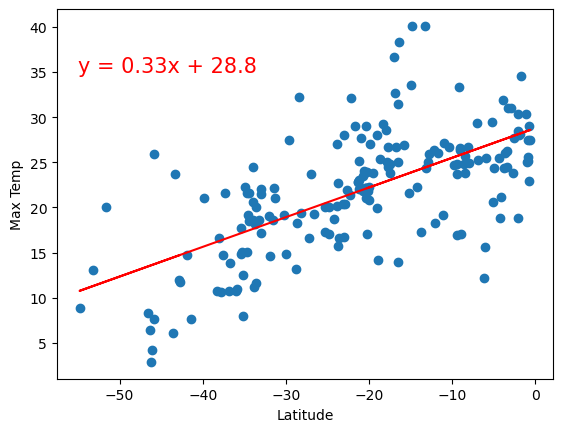

In [16]:
# Linear regression on Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05689741545789598


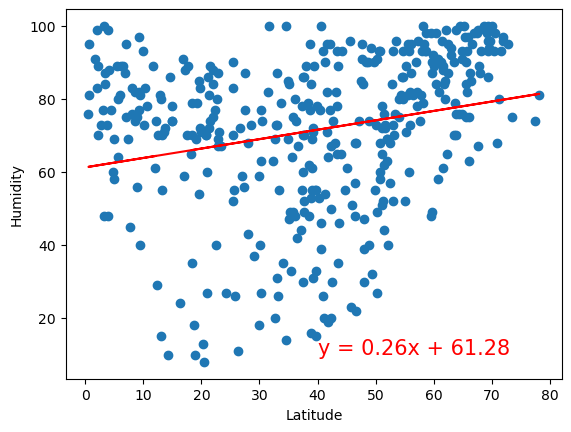

In [17]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.0002808747046324607


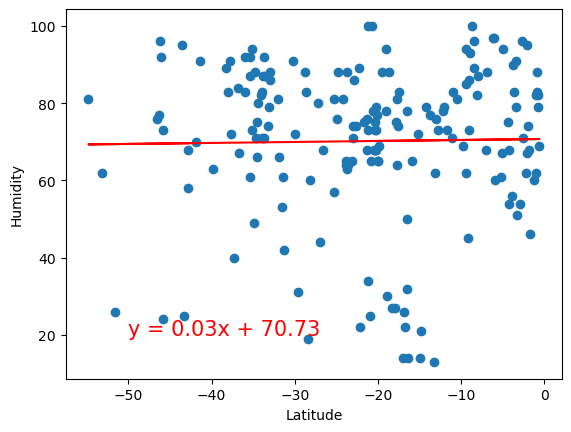

In [18]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.024026517125811015


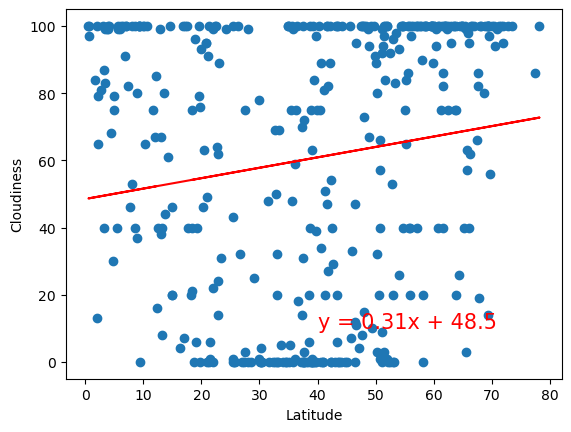

In [19]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.02056735429994368


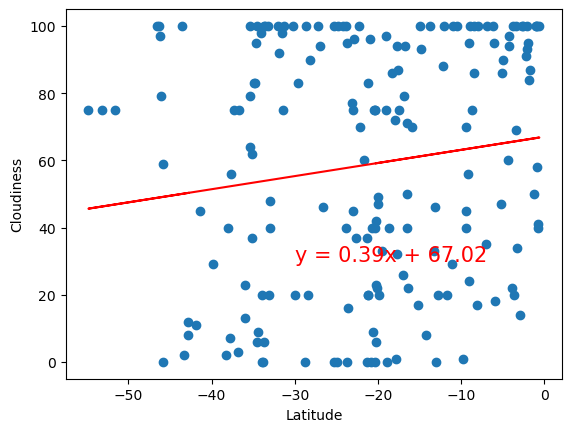

In [20]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.030396762354449467


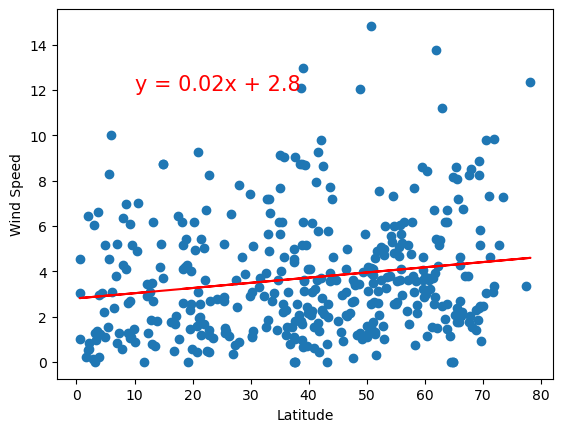

In [21]:
# Northern Hemisphere
# YOUR CODE HERE

The r-value is: 0.062239040700515696


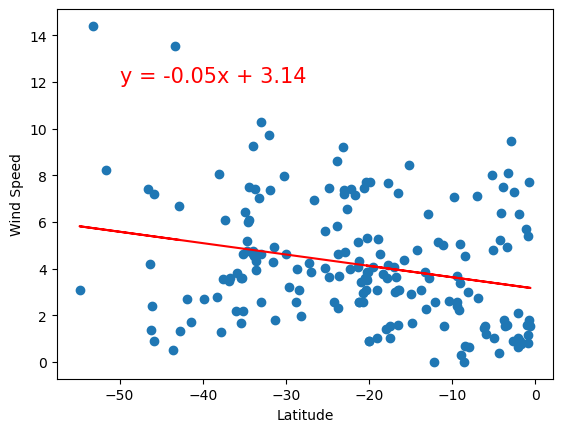

In [22]:
# Southern Hemisphere
# YOUR CODE HERE

**Discussion about the linear relationship:** YOUR RESPONSE HERE